In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# read in the three csv files
data_18 = pd.read_csv('DemandData_2018.csv')
data_17 = pd.read_csv('DemandData_2017.csv')
data_11 = pd.read_csv('DemandData_2011-2016.csv')

In [3]:
# change the name of the first two columns for convenience
data_18.columns = ['date', 'period'] + list(data_18.columns[2:])
data_17.columns = ['date', 'period'] + list(data_17.columns[2:])
data_11.columns = ['date', 'period'] + list(data_11.columns[2:])

# I think I won't actually be doing this cos I'm dropping em...

In [4]:
# join the three dataframes into one
energy = pd.concat([data_11, data_17, data_18])

# reset the index
energy.reset_index(drop=True, inplace=True)

In [5]:
energy.head()

,date,period,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
0,01-Jan-2011,1,34606,34677,35648,35685,31058,484,1730,0,...,67,1939,0,-382,0,1922,0,-382,0,35685.0
1,01-Jan-2011,2,35092,35142,36089,36142,31460,520,1730,0,...,20,1939,0,-381,0,1922,0,-381,0,36142.0
2,01-Jan-2011,3,34725,34761,36256,36234,31109,520,1730,0,...,558,1989,0,-382,0,1974,0,-382,0,36234.0
3,01-Jan-2011,4,33649,33698,35628,35675,30174,512,1730,0,...,997,1991,0,-381,0,1975,0,-381,0,35675.0
4,01-Jan-2011,5,32644,32698,34752,34805,29253,512,1730,0,...,1127,1992,0,-382,0,1975,0,-382,0,34805.0


In [6]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139440 entries, 0 to 139439
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       139440 non-null  object 
 1   period                     139440 non-null  int64  
 2   ND                         139440 non-null  int64  
 3   I014_ND                    139440 non-null  int64  
 4   TSD                        139440 non-null  int64  
 5   I014_TSD                   139440 non-null  int64  
 6   ENGLAND_WALES_DEMAND       139440 non-null  int64  
 7   EMBEDDED_WIND_GENERATION   139440 non-null  int64  
 8   EMBEDDED_WIND_CAPACITY     139440 non-null  int64  
 9   EMBEDDED_SOLAR_GENERATION  139440 non-null  int64  
 10  EMBEDDED_SOLAR_CAPACITY    139440 non-null  int64  
 11  NON_BM_STOR                139440 non-null  int64  
 12  PUMP_STORAGE_PUMPING       139440 non-null  int64  
 13  I014_PUMP_STORAGE_PUMPING  13

In [7]:
energy.describe()

,period,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
count,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,...,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,139440.000000,87648.000000
mean,24.500229,32819.762220,32674.302539,34030.971135,33944.046895,29819.529554,946.034187,3583.156060,707.551728,6688.950065,...,436.232387,1156.505974,720.959617,-99.636044,-58.528708,1143.348064,721.336941,-99.472038,-58.460291,35326.890323
std,13.853846,7477.924477,7506.046731,7517.386702,7500.241887,6812.238331,630.310670,1446.913994,1384.201157,4621.010995,...,701.830973,935.923331,417.124161,194.007630,249.560568,924.772402,417.498993,193.728638,249.002171,7544.379962
min,1.000000,15841.000000,15014.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,79.000000,...,0.000000,-2056.000000,-1215.000000,-475.000000,-580.000000,-2024.000000,-1215.000000,-475.000000,-580.000000,0.000000
25%,12.750000,26991.000000,26806.000000,28360.000000,28297.000000,24474.000000,450.000000,2085.000000,0.000000,2030.000000,...,11.000000,894.000000,565.000000,-251.000000,-242.000000,885.000000,564.000000,-251.000000,-242.000000,29804.000000
50%,24.500000,32427.000000,32297.000000,33485.000000,33388.000000,29459.000000,819.000000,3897.000000,9.000000,5968.000000,...,16.000000,1488.000000,940.000000,-112.000000,0.000000,1476.000000,941.000000,-112.000000,0.000000,35222.500000
75%,36.250000,38269.250000,38174.000000,39336.000000,39239.000000,34826.000000,1326.000000,4831.000000,704.000000,11503.000000,...,827.000000,1991.000000,999.000000,0.000000,0.000000,1967.000000,999.000000,0.000000,0.000000,40284.000000
max,50.000000,55765.000000,55751.000000,59188.000000,59022.000000,51254.000000,3478.000000,5978.000000,9390.000000,13052.000000,...,2747.000000,2066.000000,1143.000000,402.000000,504.000000,1997.000000,1143.000000,402.000000,500.000000,59022.000000


Given the shifting issue, rather than combining the date and period columns into a single datetime object, we simply drop the date / period information and set an index using pd.date_range

In [12]:
# setting the index as the datetime objects - incorporating the date and the beginning time of the half-hour period
energy.set_index(pd.date_range('2011-01-01', '2018-12-15', len(energy)+1)[:-1], inplace=True)
# up to the second last datetime object in the date_range, since the date_range goes up to 12am - we end at 11.30pm.

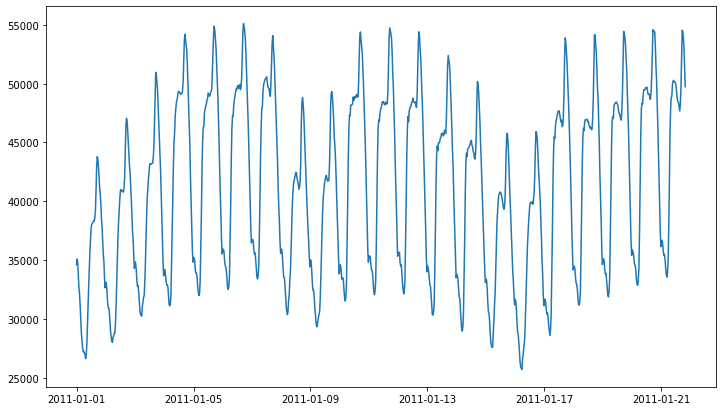

In [13]:
# just visualising the data now. Can see some interesting features already - weekend dips
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(energy.ND.iloc[:1000])

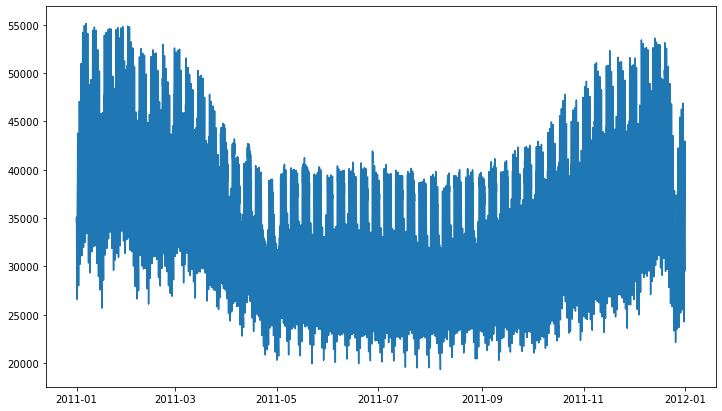

In [19]:
# Looking at the whole of 2011. Can see strong relevance of seasonality.
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(energy.ND.iloc[:(365*48)])

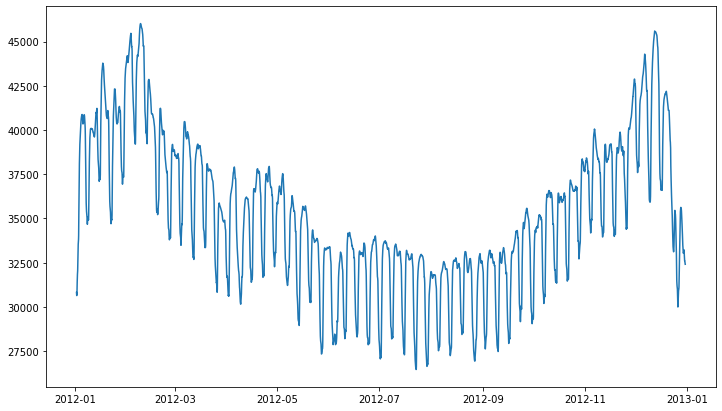

In [35]:
# Looking at 2012, smoothing the data using rolling means.
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(energy.ND.iloc[(365*48):(2*365*48)].rolling(48).mean())

# using 48-entry rolling mean --- what's the intuition of what it does to the graph????
# I think maybe this removed the daily fluctuations, and what we see are the weekly fluctuations?

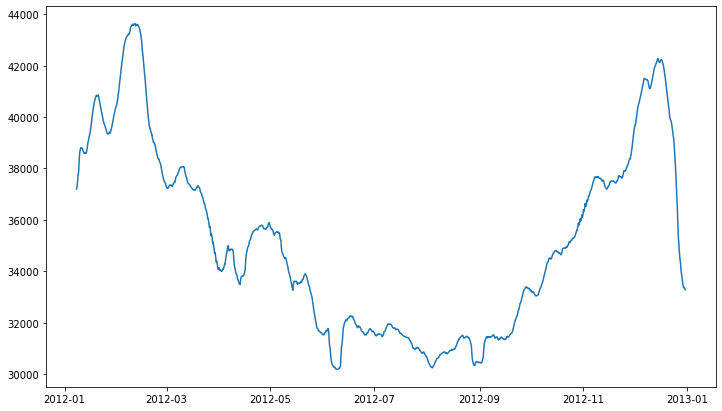

In [38]:
# Looking at 2012, smoothing the data using rolling means.
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(energy.ND.iloc[(365*48):(2*365*48)].rolling((48*7)).mean())

# Now the daily and weekly fluctuations are removed.

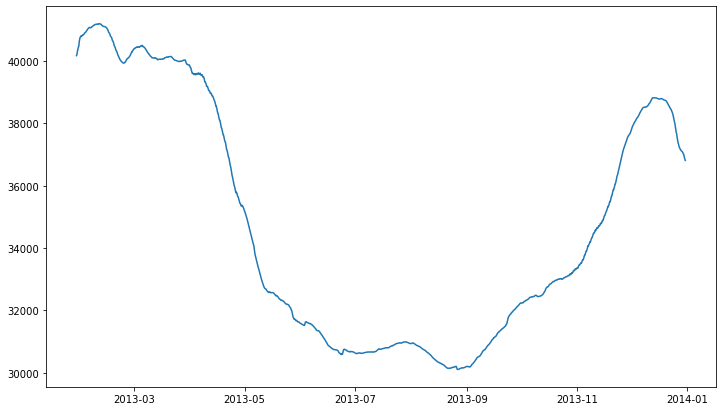

In [41]:
# Looking at 2013, smoothing the data using rolling means.
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(energy.ND.iloc[(2*365*48):(3*365*48)].rolling((48*7*4)).mean())

# Now the daily, weekly and monthly fluctuations are removed, and all we see is an indication of a yearly trend

In [46]:
# save the compiled datset
energy.drop('date', axis=1, inplace=True)
energy.drop('period', axis=1, inplace=True)

In [47]:
energy.to_csv('energy.csv')